# MOVIE RECOMMENDATION SYSTEM

### Import the necessary statements

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import sklearn

#necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import rcParams


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#necessary libraries for tokenisation
from rake_nltk import Rake
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

# Import Surprise Library for importing recommendation models
import surprise
from surprise import Reader, Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold ,GridSearchCV , RandomizedSearchCV

import os
from sklearn.metrics import pairwise_distances
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

# !pip3 install wordcloud
# !pip install rake_nltk


import datetime
import random

#change to proper time format

from datetime import datetime


### Loading the dataset and Analysing the dataset

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Vijay Thanikonda <br>
             NAME: Data Loading  <br>
             PARAMETERS: movies, Dataframe containing the tmdb dataset  <br>
             PURPOSE: This module is used to load the tmdb_movies_data.csv dataset and analyse the features and values of the datset<br>
             PRECONDITION: tmdb_movies_data.csv should not be empty  <br>
             POSTCONDITION: It loads the  tmdb_movies_data into a movies dataframe and analyse the features<br>
        </p>
    </span>    
</div>



In [2]:
movies=pd.read_csv("tmdb_movies_data.csv")


In [3]:
movies.head(35)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

In [4]:
movies.shape

(10866, 21)

In [5]:
print(movies.columns.values)


['id' 'imdb_id' 'popularity' 'budget' 'revenue' 'original_title' 'cast'
 'homepage' 'director' 'tagline' 'keywords' 'overview' 'runtime' 'genres'
 'production_companies' 'release_date' 'vote_count' 'vote_average'
 'release_year' 'budget_adj' 'revenue_adj']


In [6]:
print(movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
movies.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Preprocessing


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Vijay Thanikonda<br>
             NAME: Data Preprocessing  <br>
             PARAMETERS: movies, Dataframe containing the tmdb dataset  <br>
             PURPOSE: This module is used to preprocess the dataset by removig missing and duyplicate values<br>
             PRECONDITION: movies should not be empty  <br>
             POSTCONDITION: it saves the preprocessed movie info in a dataframe and saves to excel sheet.It is then used for movie recommendation  <br>
        </p>
    </span>    
</div>



In [8]:
movies.duplicated().sum() # finding the duplicate values on based on id

1

In [9]:
movies.drop_duplicates(inplace=True) # dropping the duplicate values on based on id

In [10]:
movies.shape

(10865, 21)

In [11]:
movies.isnull().sum() #finding the null values in each column

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
movies = movies.drop(['imdb_id','homepage',], axis=1)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The above cells showsthat there are many null values in homepage, director, tagline, keywords and production companies.So dropping imdb_id(repeated values for id) and homepage.
        </p>
    </span>    
</div>

In [13]:
# Replaced the null values with proper values
movies['keywords'].fillna("No Keywords Aailable", inplace=True)
movies['tagline'].fillna("No Tagline ", inplace=True)
movies['production_companies'].fillna("Anonymous ", inplace=True)
movies['cast'].fillna("Anonymous ", inplace=True)
movies['director'].fillna("Anonymous ", inplace=True)
movies['genres'].fillna("Not available ", inplace=True)
movies['overview'].fillna("No overview ", inplace=True)


In [14]:
movies.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The below cell replacing the zero values with mean values for numerical values
        </p>
    </span>    
</div>

In [15]:
movies[['budget', 'revenue', 'runtime']].apply(lambda val: np.sum(val==0)) #finding number of zeroes in numerical values


budget     5696
revenue    6016
runtime      31
dtype: int64

In [16]:
#replacing zero values with mean value with respective to their column
movies[['budget', 'revenue', 'runtime']] = movies[['budget', 'revenue', 'runtime']].apply(lambda val: val.replace(0, val.mean()))



In [17]:
movies[['budget', 'revenue', 'runtime']].apply(lambda val: np.sum(val==0))


budget     0
revenue    0
runtime    0
dtype: int64

In [18]:
#convert to a proper data time format
movies['release_date'] = pd.to_datetime(movies['release_date'])


In [19]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace('|',' ').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')


In [20]:
movies.rename(columns={'genres':'genre', 'original_title':'movie_name', 'release_year':'year'}, inplace=True)


movies = movies[['id', 'movie_name', 'director', 'genre', 'runtime', 'budget', 'tagline','overview','keywords',
                'production_companies','cast', 'revenue', 'vote_average','vote_count',  'popularity', 'release_date', 'year']]


### Removing Duplicate Values


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Gayatri Regana<br>
             NAME: Removing Duplicate movies  <br>
             PARAMETERS: movies, Dataframe containing the tmdb dataset  <br>
             PURPOSE: This module is used to drop the duplicate rows with same id or movie name <br>
             PRECONDITION: movies should not be empty  <br>
             POSTCONDITION: it saves the movie info in a dataframe and saves to excel sheet.It is then used for movie recommendation  <br>
        </p>
    </span>    
</div>



In [21]:
movies['movie_name'].value_counts().sort_values(ascending=False)


Hamlet                      4
Frankenstein                3
The Black Hole              3
Shelter                     3
Hercules                    3
                           ..
Paint Your Wagon            1
Jaws 2                      1
Superman                    1
Animal House                1
Manos: The Hands of Fate    1
Name: movie_name, Length: 10571, dtype: int64

In [22]:
movies['id'].value_counts().sort_values(ascending=False).head()


135397    1
211672    1
158852    1
131634    1
262500    1
Name: id, dtype: int64

In [23]:
duplicate_movies = movies.groupby('movie_name').filter(lambda x: len(x) >= 2)
duplicate_ids = duplicate_movies['id'].values


In [24]:
duplicate_movies['movie_name'].unique()

array(['The Revenant', 'Cinderella', 'Home', 'Everest', 'Point Break',
       'Fantastic Four', 'Survivor', 'Legend', 'Concussion',
       'Poltergeist', 'The Gift', 'Heist', 'No Escape', 'Sisters', 'Max',
       'Hot Pursuit', 'Macbeth', 'Howl', 'Love', 'Life', 'Frankenstein',
       'The Program', 'Cyberbully', 'Intruders', 'Bound',
       'Finders Keepers', 'Brothers', 'The Challenger', 'Submerged',
       'Vendetta', 'Student Bodies', 'Teenage Mutant Ninja Turtles',
       'Godzilla', 'Cake', 'Left Behind', 'Hercules', 'Neighbors',
       'Non-Stop', 'RoboCop', 'Annie', 'The Signal', 'Into the Storm',
       'The Forger', 'Endless Love', 'Bullet', 'Pride', 'The Double',
       'Zodiac', 'Feast', 'Deliver Us from Evil', 'Shelter',
       'Night Moves', 'Sleeping Beauty', 'Flowers in the Attic', 'Grace',
       'Creep', 'Iris', 'Julia', "Rosemary's Baby", 'Eden',
       'The Man in the Iron Mask', 'The Hills Have Eyes',
       'The Island of Dr. Moreau', 'The Sentinel', 'Sherlock Hol

In [25]:
duplicate_ids

array([281957, 150689, 228161, 253412, 257088, 166424, 334074, 276907,
       321741, 243688, 328425, 336004, 192141, 266294, 272878, 268920,
       225728, 301846, 292431, 300153, 337029, 271736, 317144, 333674,
       316410, 319152, 330037, 340247, 291290, 332177, 357974,  98566,
       124905, 284276, 218043, 184315, 195589, 225574,  97020, 196867,
       242095, 216282, 255157, 226857, 169298, 234200, 146015, 285135,
       293299, 184346, 287426, 157823, 275318, 236399, 289416, 250574,
       295799, 281778, 278632, 296626, 267795, 283330,  42222,   4199,
        12262,  26932,  18196,  10528,  12244,  17979,   7445,  14435,
        62320,  45650,  19851,  24150,  71883,  30844,  19904,  13207,
        18405,  25754,  33788,  61872,  28665,  79896,  31218,  22717,
        27646,  36597,  24832,  41522,  36465,  21398, 183894, 220903,
        28238,  20323,  12155,  20662,  44264,  18823,  44048,  23830,
        38745,  46261,  38575,  23437,  41505,  38363,  13477,  46541,
      

In [26]:
duplicate_movies = duplicate_movies[['id','movie_name']]


In [27]:
duplicate_movies

,id,movie_name
5,281957,The Revenant
18,150689,Cinderella
46,228161,Home
52,253412,Everest
54,257088,Point Break
...,...,...
10818,39995,Long Weekend
10827,2661,Batman
10849,28270,Gambit
10853,15598,Alfie


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The below cell drops the duplicate values based on same movie_name
        </p>
    </span>    
</div>

In [28]:
movies=movies.loc[~movies['id'].isin(duplicate_ids)]
movies=movies.loc[~movies['movie_name'].isin(duplicate_movies)]


In [29]:
movies.shape

(10295, 17)

In [30]:
movies.to_csv('final.csv',index=False)


### Demographic Recommendation


## Visualizations

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Gayatri Regana <br>
             NAME: Data Visualizations  <br>
             PARAMETERS: movies, Dataframe containing the tmdb dataset  <br>
             PURPOSE: This module shows the visualizations for data analysing
             PRECONDITION: tmdb_movies_data.csv should not be empty  <br>
             POSTCONDITION: It analyses the features and visualize them<br>
        </p>
    </span>    
</div>



In [31]:
mean_vote= movies['vote_average'].mean()
min_vote= movies['vote_count'].quantile(0.8)


In [32]:
def weighted_rating(data, mean_vote=mean_vote, min_vote=min_vote):
    count_vote = data['vote_count']
    avg_vote = data['vote_average']
    rating =  (count_vote/(count_vote+min_vote) * avg_vote) + (min_vote/(min_vote+count_vote) * mean_vote)
    return round(rating, 3)

In [33]:
top_movies = movies.copy().loc[movies['vote_count'] >= min_vote]
top_movies['rating'] = top_movies.apply(weighted_rating, axis=1)

In [34]:
top_movies

,id,movie_name,director,genre,runtime,budget,tagline,overview,keywords,production_companies,cast,revenue,vote_average,vote_count,popularity,release_date,year,rating
0,135397,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,124.0,150000000.0,The park is open.,Twenty-two years after the events of Jurassic ...,monster|dna|tyrannosaurus rex|velociraptor|island,Universal Studios|Amblin Entertainment|Legenda...,[Chris Pratt Bryce Dallas Howard Irrfan Khan V...,1.513529e+09,6.5,5562,32.985763,2015-06-09,2015,6.482
1,76341,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,120.0,150000000.0,What a Lovely Day.,An apocalyptic story set in the furthest reach...,future|chase|post-apocalyptic|dystopia|australia,Village Roadshow Pictures|Kennedy Miller Produ...,[Tom Hardy Charlize Theron Hugh Keays-Byrne Ni...,3.784364e+08,7.1,6185,28.419936,2015-05-13,2015,7.065
2,262500,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,119.0,110000000.0,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,based on novel|revolution|dystopia|sequel|dyst...,Summit Entertainment|Mandeville Films|Red Wago...,[Shailene Woodley Theo James Kate Winslet Anse...,2.952382e+08,6.3,2480,13.112507,2015-03-18,2015,6.276
3,140607,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,136.0,200000000.0,Every generation has a story.,Thirty years after defeating the Galactic Empi...,android|spaceship|jedi|space opera|3d,Lucasfilm|Truenorth Productions|Bad Robot,[Harrison Ford Mark Hamill Carrie Fisher Adam ...,2.068178e+09,7.5,5292,11.173104,2015-12-15,2015,7.445
4,168259,Furious 7,James Wan,Action|Crime|Thriller,137.0,190000000.0,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,car race|speed|revenge|suspense|car,Universal Pictures|Original Film|Media Rights ...,[Vin Diesel Paul Walker Jason Statham Michelle...,1.506249e+09,7.3,2947,9.335014,2015-04-01,2015,7.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755,621,Grease,Randal Kleiser,Music,110.0,6000000.0,Grease is the word,Australian good girl Sandy and greaser Danny f...,flying car|street gang|running|graduation|musical,Paramount Pictures|Robert Stigwood Organizatio...,[John Travolta Olivia Newton-John Stockard Cha...,1.818138e+08,7.0,786,1.697618,1978-07-07,1978,6.793
10758,1924,Superman,Richard Donner,Adventure|Fantasy|Action|Science Fiction,143.0,55000000.0,You'll Believe a Man Can Fly!,Mild-mannered Clark Kent works as a reporter a...,saving the world|journalist|dc comics|crime fi...,Warner Bros.|Dovemead Films|Film Export A.G.,[Marlon Brando Gene Hackman Christopher Reeve ...,3.002180e+08,6.7,518,1.210324,1978-12-14,1978,6.499
10760,8469,Animal House,John Landis,Comedy,109.0,2700000.0,It was the Deltas against the rules... the rul...,"At a 1962 College, Dean Vernon Wormer is deter...",female nudity|sex|nudity|collage|fraternity,Universal Pictures|Oregon Film Factory|Stage I...,[John Belushi Tim Matheson John Vernon Verna B...,1.410000e+08,6.7,230,1.157930,1978-07-27,1978,6.363
10762,11778,The Deer Hunter,Michael Cimino,Drama|War,183.0,15000000.0,One of the most important and powerful films o...,A group of working-class friends decides to en...,vietnam veteran|pennsylvania|vietnam|party|escape,Universal Pictures|EMI Films Ltd.,[Robert De Niro John Cazale John Savage Christ...,5.000000e+07,7.4,464,0.959754,1978-12-08,1978,6.973


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The below visualization shows the density of ratings in the top_movies.Most density is between 5 to 8
        </p>
    </span>    
</div>

<AxesSubplot:xlabel='rating', ylabel='Density'>

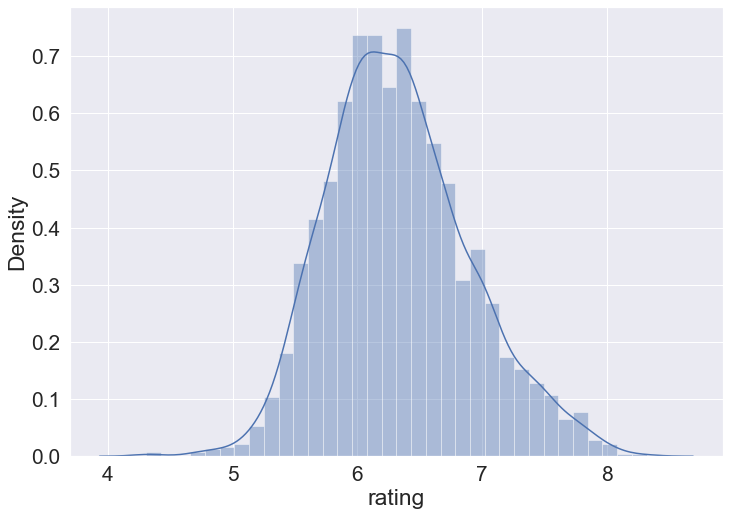

In [35]:
sns.set_style("darkgrid")
sns.set(font_scale=1.9)
%matplotlib inline

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Display distribution of rating
sns.distplot(top_movies['rating'].fillna(top_movies['rating'].median()))

<AxesSubplot:xlabel='revenue', ylabel='budget'>

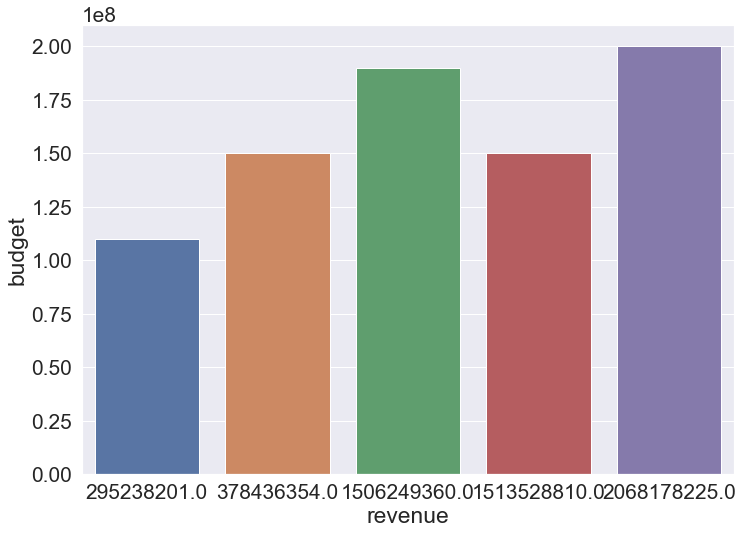

In [36]:
sns.barplot(x='revenue', y='budget', data=movies.head())


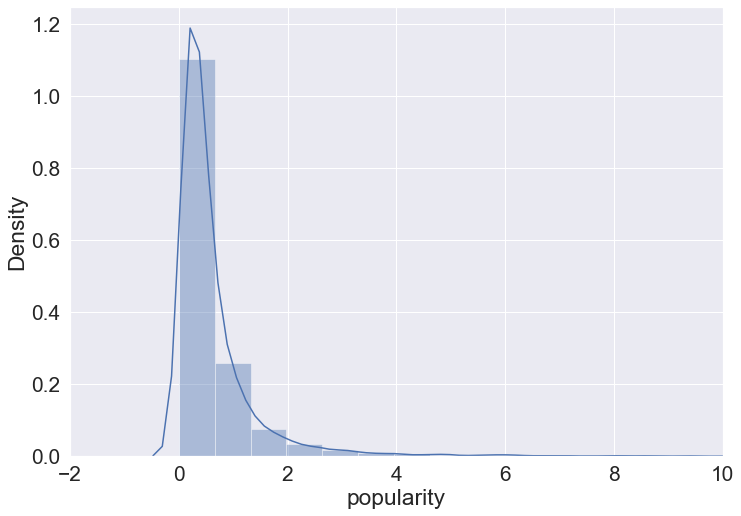

In [37]:
plot=sns.distplot(movies['popularity'].fillna(movies['popularity'].median()))
plot.set_xlim(left=-2, right=10)
plt.show()

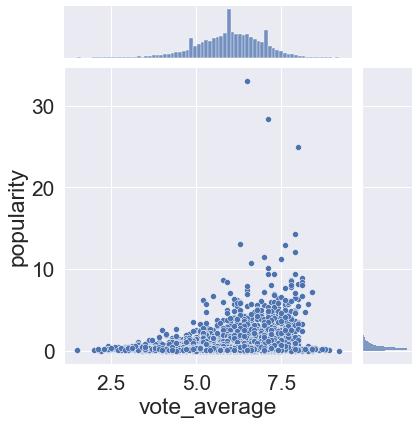

In [38]:
sns.jointplot(x='vote_average', y='popularity', data=movies)


In [39]:
#Sort movies based on rating calculated from weighted rating
top_movies = top_movies.sort_values('rating', ascending=False)
top_movies[['movie_name', 'vote_count', 'vote_average', 'rating','year']].head(10)


,movie_name,vote_count,vote_average,rating,year
4178,The Shawshank Redemption,5754,8.4,8.319,1994
7269,The Godfather,3970,8.3,8.189,1972
2875,The Dark Knight,8432,8.1,8.051,2008
2409,Fight Club,5923,8.1,8.031,1999
650,Whiplash,2372,8.2,8.028,2014
4177,Pulp Fiction,5343,8.1,8.024,1994
4179,Forrest Gump,4856,8.1,8.017,1994
10222,Schindler's List,2632,8.1,7.951,1993
629,Interstellar,6498,8.0,7.940,2014
9758,The Godfather: Part II,2131,8.1,7.919,1974


In [40]:
highest_movies=top_movies.groupby(['movie_name'])[['rating']].sum()
high_rated=highest_movies.nlargest(20,'rating')
high_rated.head()

,rating
movie_name,
The Shawshank Redemption,8.319
The Godfather,8.189
The Dark Knight,8.051
Fight Club,8.031
Whiplash,8.028


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The below visualization shows the top 20 movies with highest rating in the top_movies.Most density is between 5 to 8
        </p>
    </span>    
</div>

<BarContainer object of 20 artists>

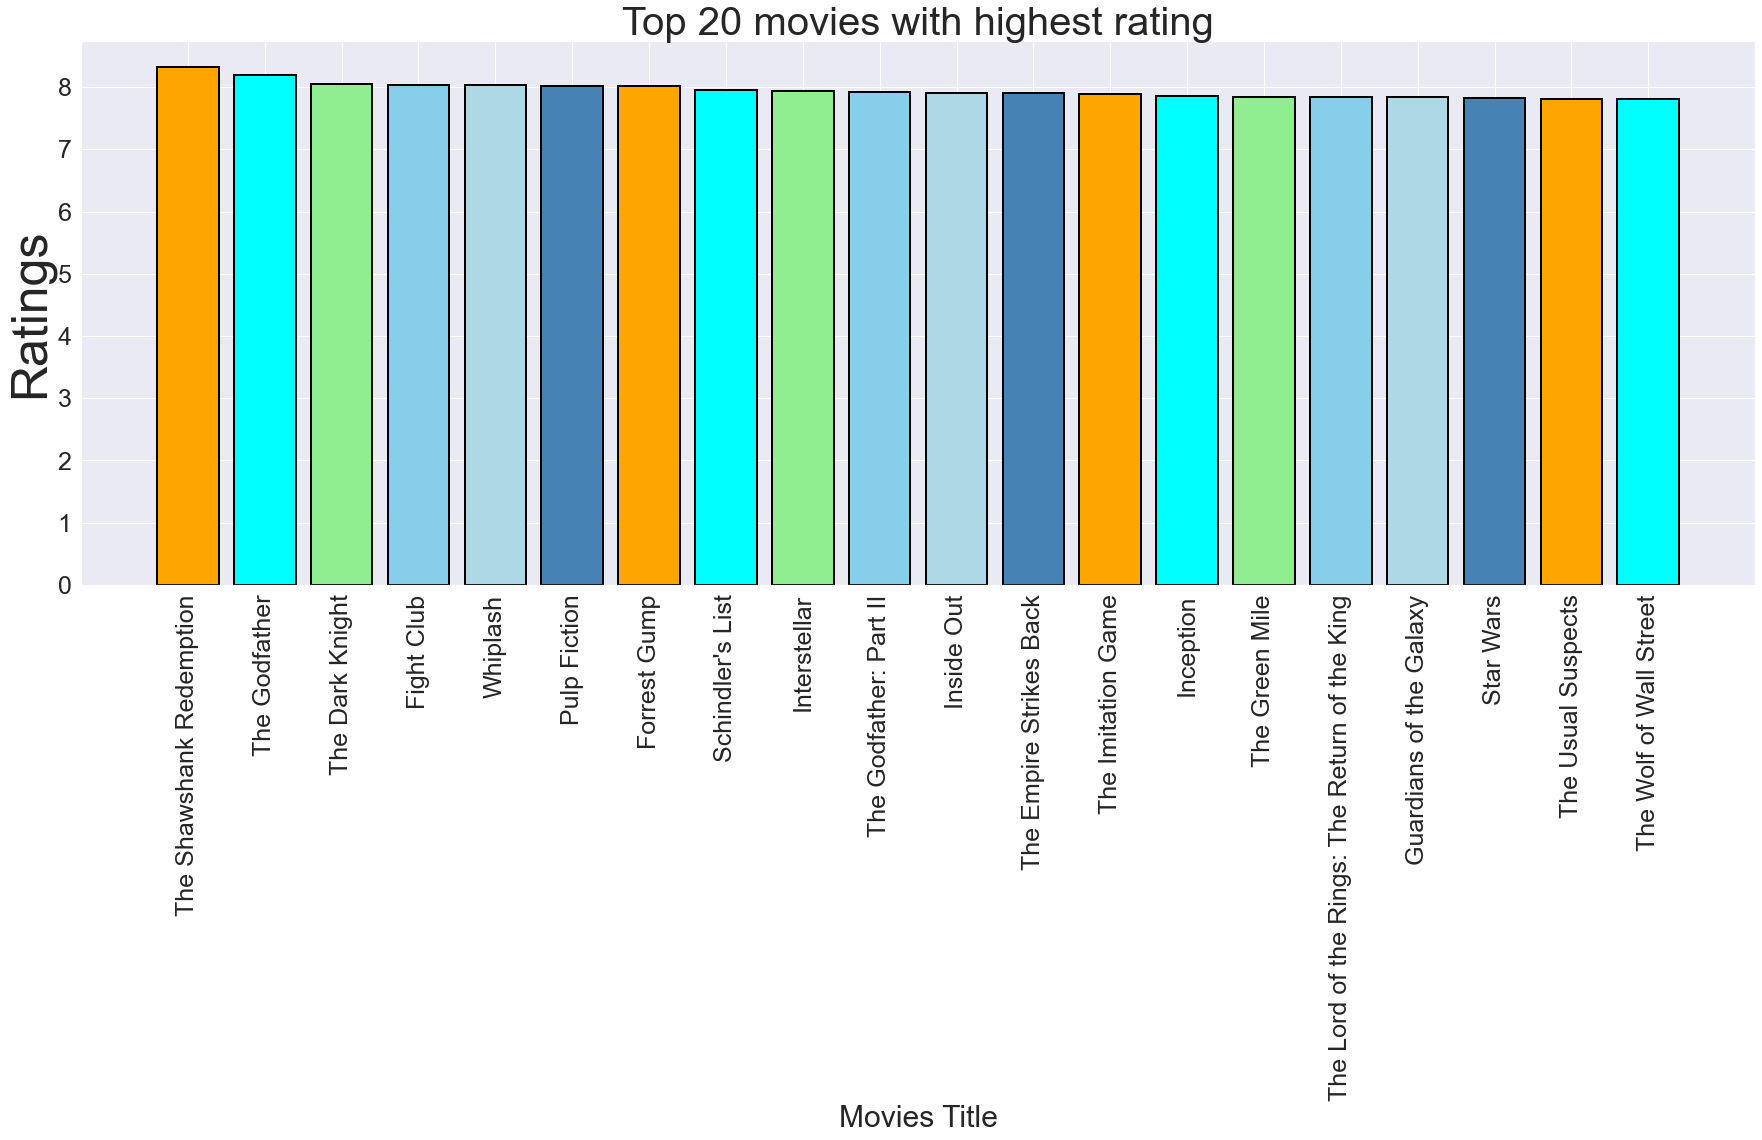

In [41]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['orange','cyan','lightgreen','skyblue','lightblue','steelblue']
plt.ylabel('Ratings',fontsize=50)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('Movies Title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=2,edgecolor='black',color=colors)

# content based Recommendation




In [42]:
movies['overview'].head(5)

0    Twenty-two years after the events of Jurassic ...
1    An apocalyptic story set in the furthest reach...
2    Beatrice Prior must confront her inner demons ...
3    Thirty years after defeating the Galactic Empi...
4    Deckard Shaw seeks revenge against Dominic Tor...
Name: overview, dtype: object

In [43]:
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
movies['overview'] = movies['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies['overview'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
def get_index(movie):
    if movie not in movie_list:
        return -1
    else:
        return indices[movie]
indices = pd.Series(movies.index, index=movies['movie_name']).drop_duplicates()


In [44]:
def get_recommendations(movie, cosine_sim=cosine_sim):
    idx = get_index(movie)
    print(idx)
    if idx == -1:
        message="Asked movie is not available in the database"
        return message
    sim_scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return movies['movie_name'].iloc[movie_indices]

In [45]:
movie_list = movies['movie_name'].unique()

In [46]:
get_recommendations('Avengers: Age of Ultron')

14


10841                          The Shooting
9512                           Midnight Run
2264     Gekijouban Trigun: Badlands Rumble
9847                            Boss Nigger
8291                               Freejack
10514                              Critters
7024              The Chronicles of Riddick
5437                                Riddick
74                   Mythica: The Darkspore
391                         The Survivalist
Name: movie_name, dtype: object

In [47]:
movies["genre"] = movies["genre"].apply(lambda x: x.replace("|"," "))
movies["keywords"] = movies["keywords"].apply(lambda x: x.replace("|"," "))
def create_BOW(movie):
    return ' '.join(movie['keywords']) + ' ' + ' '.join(movie['cast']) + ' ' + movie['director'] + ' ' + ' '.join(movie['genre'])
movies['bag_of_words'] = movies.apply(create_BOW, axis=1)
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['bag_of_words'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
# Reset index of our main DataFrame and construct reverse mapping as before
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['movie_name'])


In [48]:
movies['bag_of_words']

0        m o n s t e r   d n a   t y r a n n o s a u r ...
1        f u t u r e   c h a s e   p o s t - a p o c a ...
2        b a s e d   o n   n o v e l   r e v o l u t i ...
3        a n d r o i d   s p a c e s h i p   j e d i   ...
4        c a r   r a c e   s p e e d   r e v e n g e   ...
                               ...                        
10290    s u r f e r   s u r f b o a r d   s u r f i n ...
10291    c a r   r a c e   r a c i n g   f o r m u l a ...
10292    c a r   t r o l l e y   s t e a l i n g   c a ...
10293    s p o o f Tatsuya Mihashi Akiko Wakabayashi Mi...
10294    f i r e   g u n   d r i v e   s a c r i f i c ...
Name: bag_of_words, Length: 10295, dtype: object

In [49]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

4156


2730                                      The Dark Knight
5917                                        Batman Begins
598                                          Interstellar
6269                                         The Prestige
79                                               Child 44
1050                        Interstellar: Nolan's Odyssey
3092    Batman Unmasked: The Psychology of the Dark Kn...
3518                             Guns, Girls and Gambling
9718                                         True Romance
1821                                            Inception
Name: movie_name, dtype: object

In [50]:
get_recommendations('The Godfather', cosine_sim2)

6932


9274          The Godfather: Part II
7454                  Apocalypse Now
9480         The Godfather: Part III
7545                 The Cotton Club
232                      Wild Horses
3978    The Kid Stays in the Picture
8059                          Eraser
8110                     Bulletproof
9280                The Conversation
519              Listen to Me Marlon
Name: movie_name, dtype: object

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The below visualization shows the different types of genres and movie_titles in the dataset
        </p>
    </span>    
</div>

In [51]:
genres=[]
for genre in movies.genre:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.movie_name:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)    

In [52]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

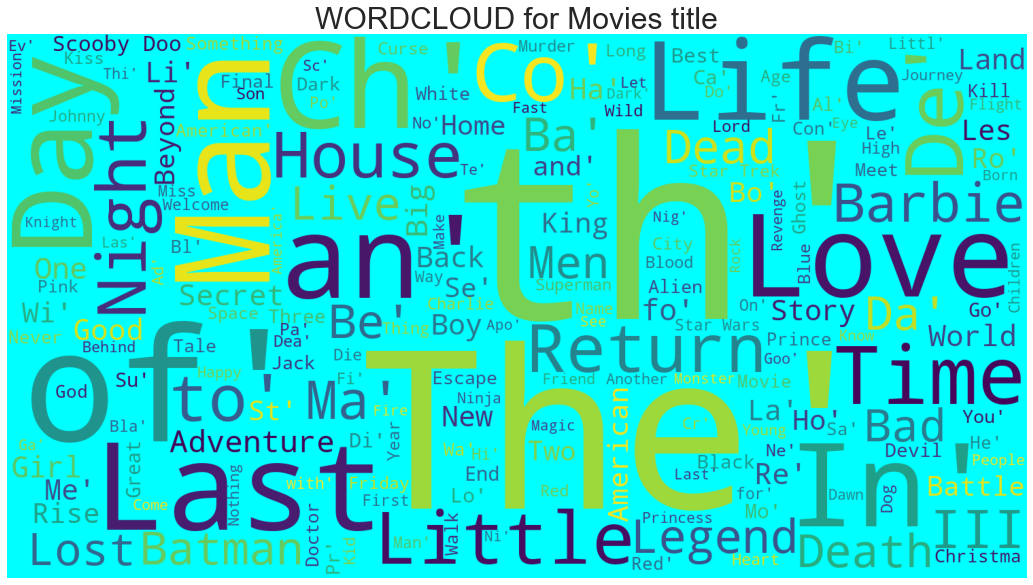

In [53]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

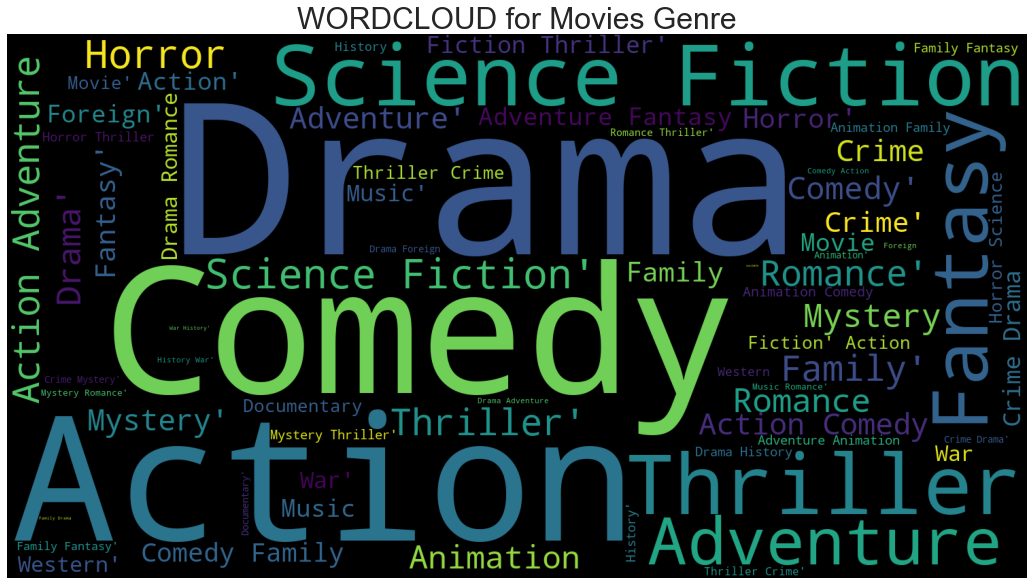

In [54]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)


In [55]:
# pip freeze > requirements.txt


In [56]:
# conda install -c conda-forge scikit-surprise


## Collaborative Filtering Based Recommendation System


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Rakshitha Krishnan <br>
             NAME: Collaborative Filtering  <br>
             PARAMETERS: movies, Dataframe containing the movie_lens dataset  <br>
             PURPOSE: This module shows the recommendations for given movie
             PRECONDITION: movie_lens dataset should not be empty  <br>
             POSTCONDITION: It analyses the features and recommends them<br>
        </p>
    </span>    
</div>

## Loaded the movielens dataset

In [57]:
#Loaded the User details, genre details, different genres and data
items = pd.read_csv('ml-100k/u.item' , header = None , sep = "|" , encoding='latin-1')
data = pd.read_csv('ml-100k/u.data', header= None , sep = '\t')
user = pd.read_csv('ml-100k/u.user', header= None , sep = '|')
genre = pd.read_csv('ml-100k/u.genre', header= None , sep = '|' )



In [58]:
#specified the required columns
items.columns = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Childrens' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci_Fi' ,
              'Thriller' , 'War' , 'Western']
genre.columns = ['Genre' , 'genre_id']
data.columns = ['user id' , 'movie id' , 'rating' , 'timestamp']
user.columns = ['user id' , 'age' , 'gender' , 'occupation' , 'zip code']

In [59]:
# Merging the columns with data table to better visualise
data = data.merge(user , on='user id')
data = data.merge(items , on='movie id')

In [60]:
data

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,60089,B. Monkey (1998),06-Feb-1998,...,0,0,0,0,0,1,0,1,0,0
99996,863,1678,1,889289570,17,M,student,60089,Mat' i syn (1997),06-Feb-1998,...,0,0,0,0,0,0,0,0,0,0
99997,863,1680,2,889289570,17,M,student,60089,Sliding Doors (1998),01-Jan-1998,...,0,0,0,0,0,1,0,0,0,0
99998,896,1681,3,887160722,28,M,writer,91505,You So Crazy (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


## Data Cleaning


In [61]:
# clean user data and merge on to data based on user id
user_rating_det = data.groupby('user id').size().reset_index()
user_rating_det.columns = ['user id' , 'number of user ratings']
data = data.merge(user_rating_det , on='user id')

# clean user data and add rating wth mean on to data based on user id

user_rating_details = data.groupby('user id')['rating'].agg('mean').reset_index()
user_rating_details.columns = ['user id' , 'average of user ratings']
data = data.merge(user_rating_details , on='user id')

# clean user data and add rating wth standard deviation on to data based on user id

user_rating_details = data.groupby('user id')['rating'].agg('std').reset_index()
user_rating_details.columns = ['user id' , 'std of user ratings']
data = data.merge(user_rating_details , on='user id')



In [62]:
# clean movie data and merge on to data based on user id

movie_rating_details = data.groupby('movie id').size().reset_index()
movie_rating_details.columns = ['movie id' , 'number of movie ratings']
data = data.merge(movie_rating_details , on='movie id')

# clean movie data and add rating wth mean on to data based on user id

movie_rating_details = data.groupby('movie id')['rating'].agg('mean').reset_index()
movie_rating_details.columns = ['movie id' , 'average of movie ratings']
data = data.merge(movie_rating_details , on='movie id')

# clean movie data and add rating wth standard deviation on to data based on user id

movie_rating_details = data.groupby('movie id')['rating'].agg('std').reset_index()
movie_rating_details.columns = ['movie id' , 'std of movie ratings']
data = data.merge(movie_rating_details , on='movie id')


In [63]:
# Data Cleaning for Model Based Recommandation System
def convert_time(x):
    return datetime.utcfromtimestamp(x).strftime('%d-%m-%Y')
def date_diff(date):
    d1 = date['release date'].split('-')[2]
    d2 = date['rating time'].split('-')[2]
    return abs(int(d2) - int(d1))



In [64]:
data.dropna(subset = ['release date'] , inplace = True)

data['age_group'] = data['age']//10
data['rating time'] = data.timestamp.apply(convert_time)
data['time difference'] = data[['release date' , 'rating time']].apply(date_diff, axis =1)

num= (data['number of user ratings']*data['average of user ratings'] + data['number of movie ratings']*data['average of movie ratings'])

den =(data['number of movie ratings']+data['number of user ratings'])
data['total rating'] = num/den

data['rating_new'] = data['rating'] - data['total rating']

del movie_rating_details
del user_rating_det

## User and movie based Similarity

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Dharani Kumar Vemuri <br>
             NAME: Collaborative Filtering  <br>
             PARAMETERS: the movie_lens dataset  <br>
             PURPOSE: This module finds the similarity for given movie
             PRECONDITION: movie_lens dataset should not be empty  <br>
             POSTCONDITION: It returns the similarity <br>
        </p>
    </span>    
</div>

In [65]:
pivot_table_user = pd.pivot_table(data=data,values='rating_new',index='user id',columns='movie id')
pivot_table_user = pivot_table_user.fillna(0)

pivot_table_movie = pd.pivot_table(data=data,values='rating',index='user id',columns='movie id')
pivot_table_movie = pivot_table_movie.fillna(0)



In [66]:
user_based_similarity = 1 - pairwise_distances( pivot_table_user.values, metric="cosine" )
user_based_similarity = pd.DataFrame(user_based_similarity)
user_based_similarity.columns = user_based_similarity.columns+1
user_based_similarity.index = user_based_similarity.index+1

movie_based_similarity = 1 - pairwise_distances( pivot_table_movie.T.values, metric="cosine" )
movie_based_similarity = pd.DataFrame(movie_based_similarity)
movie_based_similarity.columns = movie_based_similarity.columns+1
movie_based_similarity.index = movie_based_similarity.index+1

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Rakshitha Krishnan <br>
             NAME: recommend_movie   <br>
             PARAMETERS: the movied_id in the dataset  <br>
             PURPOSE: This module recommends movies based on the similarity for given movie
             PRECONDITION: movie_lens dataset should not be empty  <br>
             POSTCONDITION: It returns the dataframe of movies <br>
        </p>
    </span>    
</div>

In [67]:
def recommend_movie(movie_id):
    recommend_table = pd.DataFrame(columns = items.columns)
    movies_similarity= movie_based_similarity[movie_id].sort_values(ascending = False).index.tolist()[:11]
    for movie in movies_similarity:
        recommend_table = recommend_table.append(items[items['movie id'] == movie], ignore_index=True)
    return recommend_table



<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Dharani Kumar Vemuri<br>
             NAME: recommend_user   <br>
             PARAMETERS: the user_id in the dataset  <br>
             PURPOSE: This module recommends movies based on the similarity for given user
             PRECONDITION: movie_lens dataset should not be empty  <br>
             POSTCONDITION: It returns the dataframe of similar movies <br>
        </p>
    </span>    
</div>

In [68]:
def recommend_user(user_id):
    recommend_table = pd.DataFrame(columns = user.columns)
    user_similarity = user_based_similarity[user_id].sort_values(ascending = False).index.tolist()[:101]
    for user in user_similarity:
        recommend_table = recommend_table.append(user[user['user id'] == user], ignore_index=True)
    return recommend_table



<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Kavya Konisa <br>
             NAME: user_rating   <br>
             PARAMETERS: the user_id in the dataset  <br>
             PURPOSE: This module returns the user _rating list <br>
             PRECONDITION: movie_lens dataset should not be empty  <br>
             POSTCONDITION: It returns the dataframe of similar movies <br>
        </p>
    </span>    
</div>

In [69]:
def user_rating(user):
    similar_user_id = recommend_user(user)
    similar_user_id.drop(columns= ['age' , 'gender' , 'occupation' , 'zip code'] , inplace = True)
    similar_user_id = similar_user_id.merge(pivot_table_movie , on= 'user id')
    similar_user_id = similar_user_id.set_index('user id')
    similar_user_id.replace(0, np.nan, inplace=True)
    user_ratings = similar_user_id[similar_user.index==user]
    similar_user.drop(similar_user_id.index[0] , inplace = True)
    return user_ratings.append(similar_user_id.mean(axis = 0 , skipna = True), ignore_index = True) 




<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Dharani Kumar Vemuri <br>
             NAME: SURPRISE LIBRARY   <br>
             PARAMETERS: the user_id in the dataset  <br>
             PURPOSE: This module helps in using the builtin recommendation models. <br>
             PRECONDITION:The dataframe should be preprocessed <br>
             POSTCONDITION: It returns the dataframe of similar movies <br>
        </p>
    </span>    
</div>

In [70]:
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data[['user id', 'movie title', 'rating']], reader)

## Cross Validation on Algorithms using Matrix Factorization

In [71]:
model = NormalPredictor()
cross_validate(model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5199  1.5190  1.5179  1.5258  1.5226  1.5210  0.0028  
MAE (testset)     1.2202  1.2184  1.2211  1.2284  1.2275  1.2231  0.0040  
Fit time          0.07    0.07    0.07    0.07    0.07    0.07    0.00    
Test time         0.21    0.08    0.08    0.08    0.08    0.10    0.05    


{'test_rmse': array([1.51990778, 1.51903942, 1.51788663, 1.52577162, 1.52263297]),
 'test_mae': array([1.22016991, 1.21844603, 1.22110186, 1.22839753, 1.22753718]),
 'fit_time': (0.06773924827575684,
  0.07259511947631836,
  0.07035088539123535,
  0.0706019401550293,
  0.0694279670715332),
 'test_time': (0.20741605758666992,
  0.07693600654602051,
  0.0770711898803711,
  0.07661104202270508,
  0.07749629020690918)}

In [72]:
model = SVD()
cross_validate(model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9335  0.9391  0.9382  0.9311  0.9361  0.9356  0.0030  
MAE (testset)     0.7363  0.7392  0.7417  0.7347  0.7368  0.7377  0.0025  
Fit time          0.49    0.51    0.47    0.46    0.44    0.47    0.03    
Test time         0.08    0.08    0.08    0.08    0.08    0.08    0.00    


{'test_rmse': array([0.93352852, 0.93914707, 0.93818617, 0.9311126 , 0.93606551]),
 'test_mae': array([0.73628028, 0.73917715, 0.74173958, 0.73470966, 0.73680516]),
 'fit_time': (0.4854702949523926,
  0.5113568305969238,
  0.4713170528411865,
  0.464644193649292,
  0.4350271224975586),
 'test_time': (0.08301973342895508,
  0.08472704887390137,
  0.08130693435668945,
  0.08262109756469727,
  0.08160090446472168)}

In [73]:
model = KNNBasic(k=20)
cross_validate(model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9739  0.9750  0.9785  0.9772  0.9715  0.9752  0.0025  
MAE (testset)     0.7682  0.7688  0.7716  0.7733  0.7631  0.7690  0.0035  
Fit time          0.11    0.11    0.12    0.11    0.14    0.12    0.01    
Test time         1.52    1.51    1.57    1.51    1.59    1.54    0.04    


{'test_rmse': array([0.97390448, 0.97495529, 0.97853269, 0.977218  , 0.97150706]),
 'test_mae': array([0.76819808, 0.76883939, 0.77159384, 0.77325269, 0.76308741]),
 'fit_time': (0.1124567985534668,
  0.10726404190063477,
  0.11702179908752441,
  0.10784482955932617,
  0.1350090503692627),
 'test_time': (1.5173707008361816,
  1.5116419792175293,
  1.57305908203125,
  1.5123803615570068,
  1.5946590900421143)}

In [74]:
model = KNNBasic(sim_options={'user_based': False} , k=20) 
cross_validate(model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9814  0.9843  0.9732  0.9774  0.9821  0.9797  0.0039  
MAE (testset)     0.7736  0.7761  0.7660  0.7733  0.7762  0.7730  0.0037  
Fit time          0.22    0.19    0.18    0.18    0.18    0.19    0.02    
Test time         1.78    1.88    1.76    1.81    1.75    1.80    0.05    


{'test_rmse': array([0.98143781, 0.98431244, 0.97318408, 0.97741108, 0.98211931]),
 'test_mae': array([0.7735841 , 0.77608641, 0.76596189, 0.77333592, 0.77624881]),
 'fit_time': (0.2190849781036377,
  0.1855320930480957,
  0.17802023887634277,
  0.1780989170074463,
  0.1806478500366211),
 'test_time': (1.781019687652588,
  1.8839271068572998,
  1.7613019943237305,
  1.8135240077972412,
  1.753978967666626)}

In [75]:
model = NMF()
cross_validate(model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9649  0.9575  0.9568  0.9704  0.9579  0.9615  0.0053  
MAE (testset)     0.7586  0.7528  0.7538  0.7630  0.7526  0.7562  0.0041  
Fit time          0.73    0.76    0.78    0.72    0.72    0.74    0.02    
Test time         0.16    0.07    0.07    0.07    0.15    0.10    0.05    


{'test_rmse': array([0.96492108, 0.95752024, 0.95679317, 0.97039683, 0.95785136]),
 'test_mae': array([0.75855358, 0.75279181, 0.75384198, 0.76302357, 0.75255225]),
 'fit_time': (0.7300400733947754,
  0.7577550411224365,
  0.7797057628631592,
  0.7218880653381348,
  0.7174930572509766),
 'test_time': (0.16367006301879883,
  0.06850028038024902,
  0.06709504127502441,
  0.06646895408630371,
  0.15495872497558594)}

In [76]:
surprise_data = surprise_data.build_full_trainset()
model = SVD(n_factors = 200 , lr_all = 0.005 , reg_all = 0.02 , n_epochs = 40 , init_std_dev = 0.05)
model.fit(surprise_data)



## Movie prediction based on user_id

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
             AUTHOR: Dharani Kumar Vemuri<br>
             NAME: model_prediction   <br>
             PARAMETERS: the user_id in the dataset  <br>
             PURPOSE: This module recommends movies based on the similarity for given user
             PRECONDITION: movie_lens dataset should not be empty  <br>
             POSTCONDITION: It returns the dataframe of similar movies <br>
        </p>
    </span>    
</div>

In [77]:
def model_prediction(user_id = None , item_id = None):
    predictions = []
    if user_id is None:
        for user in surprise_data.all_users():
            predictions.append(model.predict(user, item_id, verbose = False))
        return predictions
    
    if item_id is None:
        for item in surprise_data.all_items():
            item = surprise_data.to_raw_iid(item)
            predictions.append(model.predict(user_id, item, verbose = False))
        return predictions
    return predictins.append(model.predict(user_id,item_id,verbose = False))

In [78]:
predictions = model_prediction(user_id = 197)
predictions.sort(key=lambda x: x.est, reverse=True)
for pred in predictions[:10]:
    print('Movie :-   {} with rating : {}'.format(pred.iid , pred.est))

Movie :-   Empire Strikes Back, The (1980) with rating : 5
Movie :-   Raiders of the Lost Ark (1981) with rating : 5
Movie :-   Glory (1989) with rating : 4.96521556021571
Movie :-   Alien (1979) with rating : 4.943699148080833
Movie :-   Jurassic Park (1993) with rating : 4.941948733323496
Movie :-   Godfather: Part II, The (1974) with rating : 4.931201654377697
Movie :-   Wizard of Oz, The (1939) with rating : 4.908478135061178
Movie :-   Fugitive, The (1993) with rating : 4.892716898664128
Movie :-   Star Wars (1977) with rating : 4.888347303006881
Movie :-   Braveheart (1995) with rating : 4.8627379707967355


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The below visualization shows the top 10 movies recommended based on user rating
        </p>
    </span>    
</div>

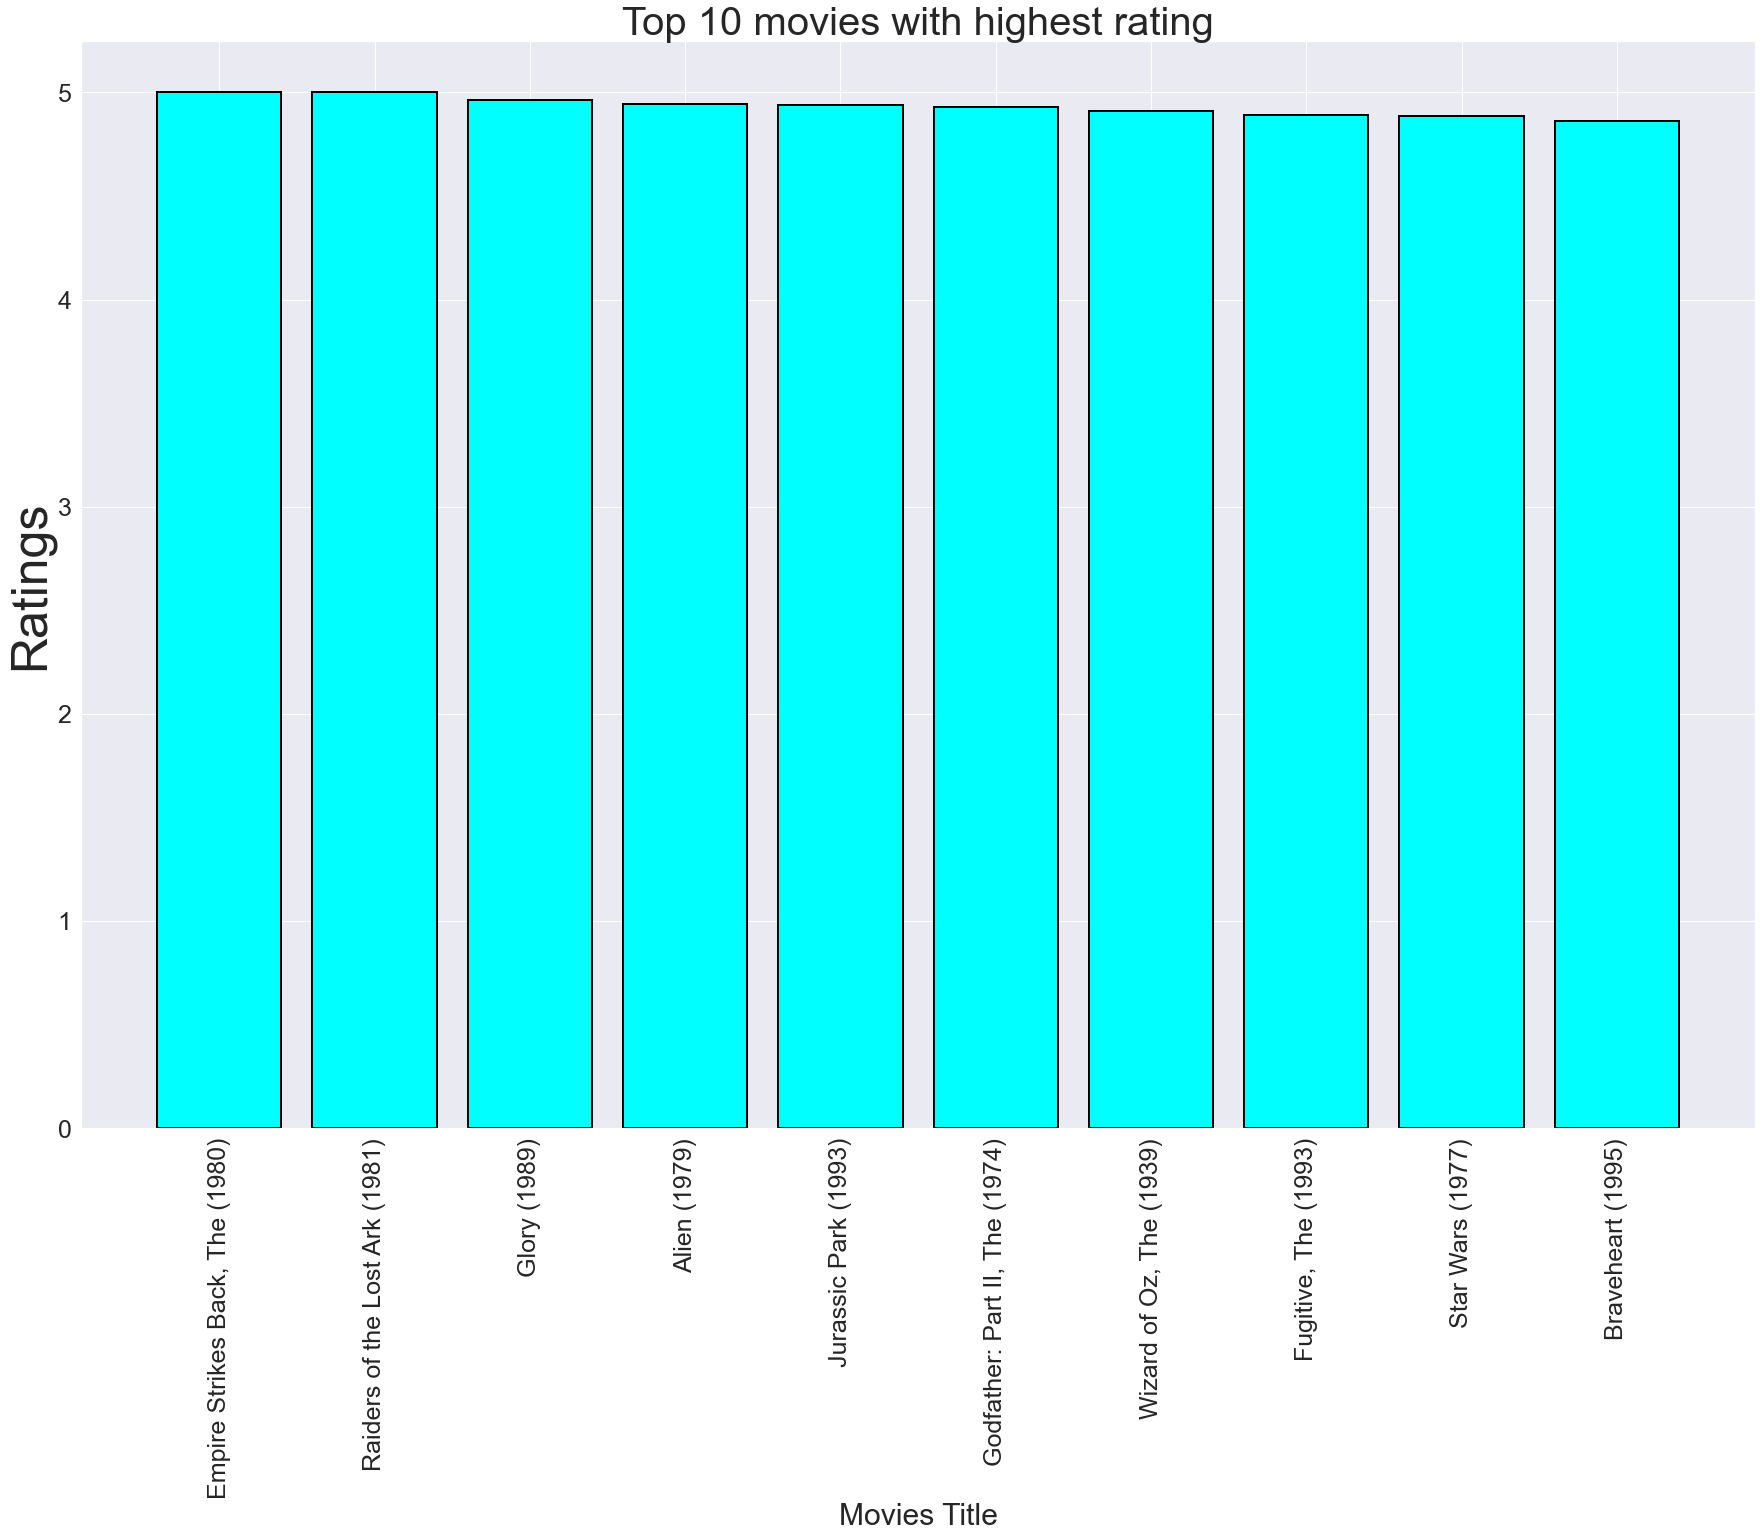

In [79]:
plt.figure(figsize=(30,20))
plt.title('Top 10 movies with highest rating',fontsize=40)
plt.ylabel('Ratings',fontsize=50)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('Movies Title',fontsize=30)
plt.yticks(fontsize=25)
for pred in predictions[:10]:
    plt.bar(pred.iid , pred.est,linewidth=2,edgecolor='black',color='cyan')


In [80]:
# pip freeze>requirements.txt